In [1]:
import numpy as np
import pandas as pd

In [2]:
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'
matchen = 'Коефіцієнт народжуваності в регіонах України'
df = pd.read_html(url, match=matchen, decimal=',')[0]
df1 = pd.read_html(url, match=matchen, decimal=',')[0]

# Вивести перші рядки таблиці за допомогою методу head
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [3]:
# Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
df.shape

(28, 9)

In [4]:
# Замініть у таблиці значення "—" на значення NaN
df_new = df.replace('—',np.nan)
#df_new.tail()
df_new

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,NaN
5,Житомирська,261.0,223.0,159.0,129,89,122,120,79
6,Закарпатська,314.0,273.0,207.0,168,115,151,146,104
7,Запорізька,219.0,197.0,150.0,124,71,106,106,68
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122,88
9,Київська,204.0,189.0,156.0,123,73,122,121,80


In [5]:
# Визначте типи всіх стовпців за допомогою dataframe.dtypes
df_new.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

In [6]:
# Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
df_new[['2014','2019']] = df_new[['2014','2019']].astype('Float64')
df_new.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      Float64
2019      Float64
dtype: object

In [7]:
# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
df_new.isnull().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

In [8]:
# Видаліть з таблиці дані по всій країні, останній рядок таблиці
#df_new1 = df_new[:-1]
df_new1 = df_new.drop([27])
df_new1.tail()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
22,Черкаська,205.0,179.0,144.0,123,75,100,98.0,64.0
23,Чернівецька,247.0,218.0,170.0,148,101,128,129.0,92.0
24,Чернігівська,220.0,183.0,127.0,108,69,94,90.0,61.0
25,Київ,NaN,174.0,159.0,120,73,120,121.0,110.0
26,Севастополь,NaN,NaN,NaN,125,70,120,<NA>,<NA>


In [9]:
# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
df_new1 = df_new1.fillna({'1950':df_new1['1950'].mean(),
                          '1960':df_new1['1960'].mean(),
                          '1970':df_new1['1970'].mean(),
                          '2014':df_new1['2014'].mean(),
                          '2019':df_new1['2019'].mean()})
df_new1.tail()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
22,Черкаська,205.00,179.000000,144.0,123,75,100,98.0,64.0
23,Чернівецька,247.00,218.000000,170.0,148,101,128,129.0,92.0
24,Чернігівська,220.00,183.000000,127.0,108,69,94,90.0,61.0
25,Київ,231.04,174.000000,159.0,120,73,120,121.0,110.0
26,Севастополь,231.04,207.576923,156.0,125,70,120,111.44,80.173913


In [10]:
# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
print('середній рівень народжуваності у 2019 році: ', df_new1['2019'].mean())

df_new1[df_new1['2019'] > df_new1['2019'].mean()][['Регіон','2019']]

середній рівень народжуваності у 2019 році:  80.17391304347828


,Регіон,2019
2,Волинська,101.0
6,Закарпатська,104.0
8,Івано-Франківська,88.0
12,Львівська,87.0
14,Одеська,88.0
16,Рівненська,107.0
20,Херсонська,81.0
23,Чернівецька,92.0
25,Київ,110.0


In [11]:
# У якому регіоні була найвища народжуваність у 2014 році?
df_new1.iloc[df_new1['2014'].idxmax(),0]

'Рівненська'

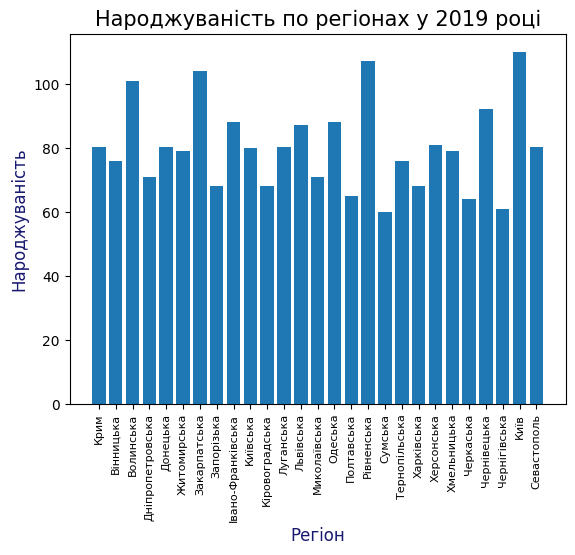

In [12]:
# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 роц
import matplotlib.pyplot as plt

data = df_new1['2019']
plt.bar(df_new1['Регіон'], data)
plt.title('Народжуваність по регіонах у 2019 році', fontsize=15)
plt.xlabel('Регіон', fontsize=12, color='midnightblue')
plt.xticks(fontsize=8, color='black',rotation=90)
plt.ylabel('Народжуваність', fontsize=12, color='midnightblue')
plt.show()

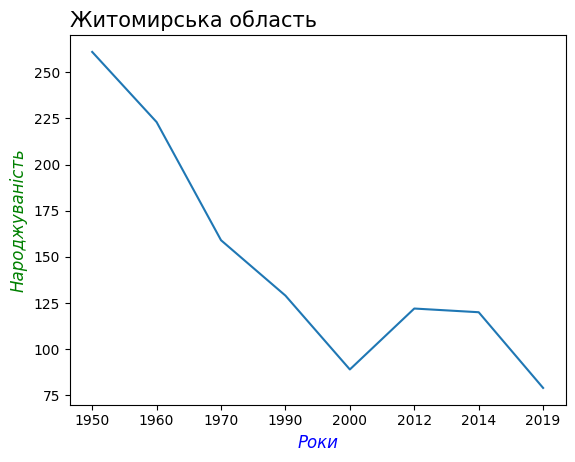

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

data_Zh = df_new1.iloc[5]
plt.plot(data_Zh[1:])
plt.xlabel('Роки',fontsize='large',fontstyle='italic',fontweight='book',color='blue')
plt.ylabel('Народжуваність',fontsize=12,fontstyle='italic',fontweight='book',color='green')
plt.title('Житомирська область', fontsize=15, loc='left')
plt.show()

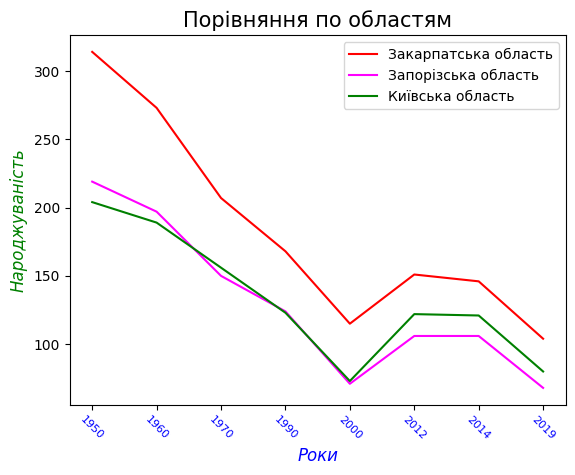

In [71]:
fig, axs = plt.subplots()
data_Zac = df_new1.iloc[6]
data_Zap = df_new1.iloc[7]
data_Ky = df_new1.iloc[9]
axs.plot(df_new1.iloc[6][1:], label='Закарпатська область', color='red')
axs.plot(df_new1.iloc[7][1:], label='Запорізська область',color='magenta')
axs.plot(df_new1.iloc[9][1:], label='Київська область',color='green')
plt.xlabel('Роки',fontsize='large',fontstyle='italic',fontweight='book',color='blue')
plt.ylabel('Народжуваність',fontsize=12,fontstyle='italic',fontweight='book',color='green')
plt.title('Порівняння по областям', fontsize=15, loc='center')
plt.xticks(fontsize=8, color='blue',rotation=-45)
plt.legend()
plt.show()

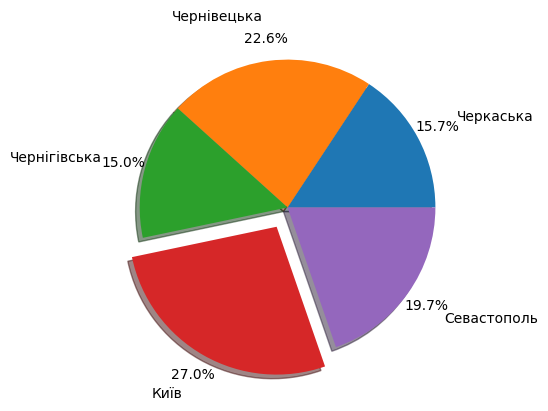

In [94]:
labels = ['Черкаська',
          'Чернівецька',
          'Чернігівська',
          'Київ',
          'Севастополь']

data = df_new1['2019'][22:]
explode = [0, 0, 0, 0.15, 0]
plt.pie(data,
        labels=labels,
        shadow=True,
        explode=explode,
        autopct="%.1f%%",
        pctdistance=1.15,
        labeldistance=1.3)
plt.show()